In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi

from sklearn.impute import KNNImputer #imputasi
from sklearn.preprocessing import StandardScaler #scaling
from imblearn.over_sampling import SMOTE #oversampling
from imblearn.over_sampling import RandomOverSampler
from wordcloud import WordCloud #visualisasi kata

In [18]:
df = pd.read_csv('diabetes.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


Lakukan preprocessing dan visualisasi pada data diabetes dengan ketentuan :

In [19]:
df.isnull().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,230
DiabetesPedigreeFunction,77
Age,154
Outcome,0


In [21]:
def count_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound)).sum()

outlier_counts = {}
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    outlier_counts[col] = count_outliers_iqr(df[col])

outlier_counts_df = pd.DataFrame(list(outlier_counts.items()),
                                 columns=['Column', 'Outlier Count'])

outlier_counts_df

,Column,Outlier Count
0,Pregnancies,4
1,Glucose,4
2,BloodPressure,39
3,SkinThickness,1
4,Insulin,26
5,BMI,14
6,DiabetesPedigreeFunction,0
7,Age,16
8,Outcome,0


1. Imputasi missing value dengan mean, median, dan modus

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi

from sklearn.impute import KNNImputer #imputasi
from sklearn.preprocessing import StandardScaler #scaling
from imblearn.over_sampling import SMOTE #oversampling
from imblearn.over_sampling import RandomOverSampler
from wordcloud import WordCloud #visualisasi kata

In [5]:
df = pd.read_csv('diabetes.csv')

df = df.fillna(df.mean())

df = df.fillna(df.median())

df.fillna(df.mode())

df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


2. Cek korelasi antar variabel dengan heatmap

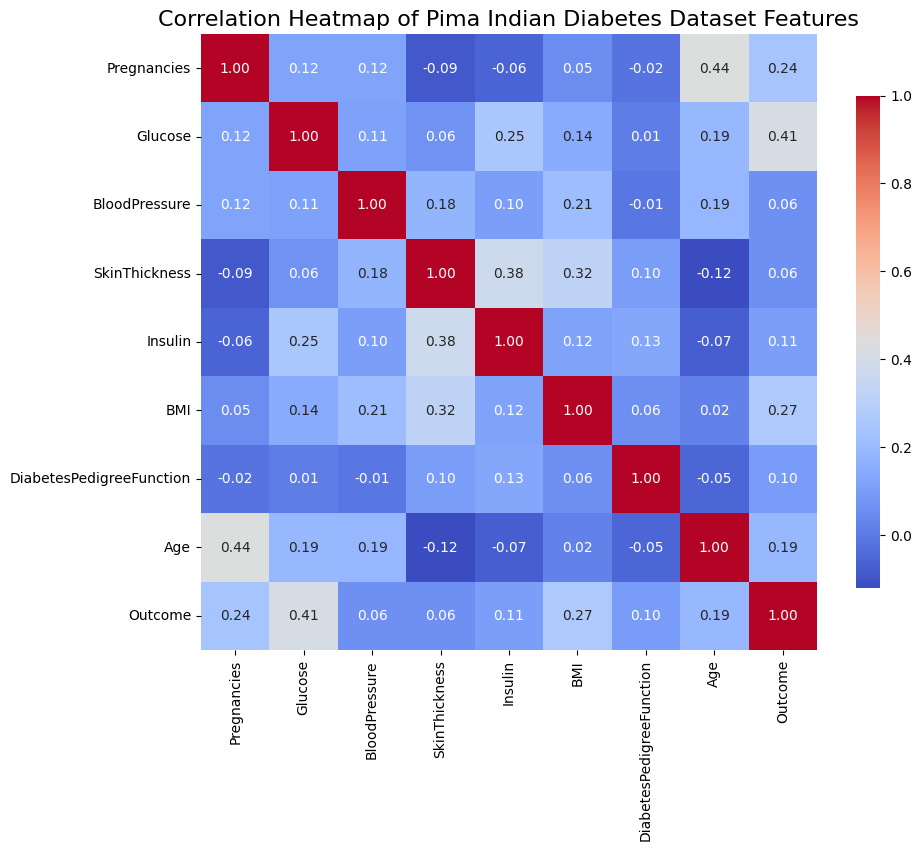

In [7]:
def plot_correlation_heatmap(data):
    plt.figure(figsize=(10, 8))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Heatmap of Pima Indian Diabetes Dataset Features', fontsize=16)
    plt.show()

plot_correlation_heatmap(df)

3. Lakukan imbalance handling dengan undersampling

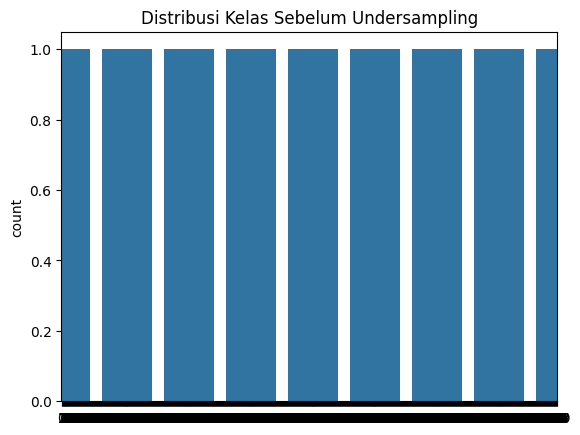

Distribusi kelas asli: Counter({0: 901, 1: 99})
Distribusi kelas setelah resampling: Counter({0: 99, 1: 99})


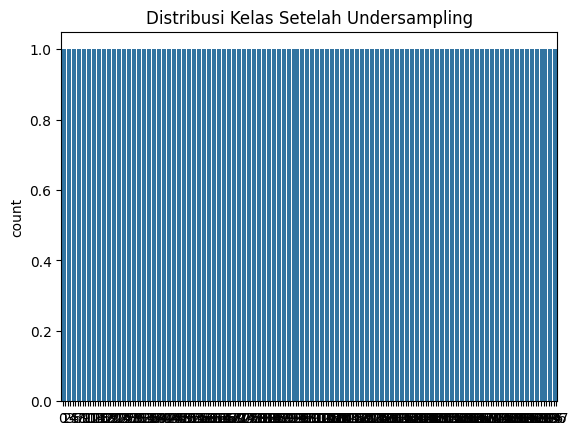

In [14]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat dataset tidak seimbang
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=1)

# Mengonversi ke DataFrame untuk visualisasi
df = pd.DataFrame(X, columns=['Fitur1', 'Fitur2'])
df['Target'] = y

# Visualisasi distribusi kelas sebelum undersampling
sns.countplot(df['Target'])
plt.title('Distribusi Kelas Sebelum Undersampling')
plt.show()

# Memeriksa distribusi asli
print(f'Distribusi kelas asli: {Counter(y)}')

# Menerapkan undersampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Memeriksa distribusi kelas baru setelah undersampling
print(f'Distribusi kelas setelah resampling: {Counter(y_res)}')

# Visualisasi distribusi kelas setelah undersampling
df_resampled = pd.DataFrame(X_res, columns=['Fitur1', 'Fitur2'])
df_resampled['Target'] = y_res

sns.countplot(df_resampled['Target'])
plt.title('Distribusi Kelas Setelah Undersampling')
plt.show()

In [23]:
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

X, y = make_classification(n_classes=2, class_sep=2,
                           n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=1)

print('Sebelum undersampling:', Counter(y))

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print('Setelah undersampling:', Counter(y_resampled))

Sebelum undersampling: Counter({0: 901, 1: 99})
Setelah undersampling: Counter({0: 99, 1: 99})


 4. Lakukan scaling dengan robust scaler dan minmax

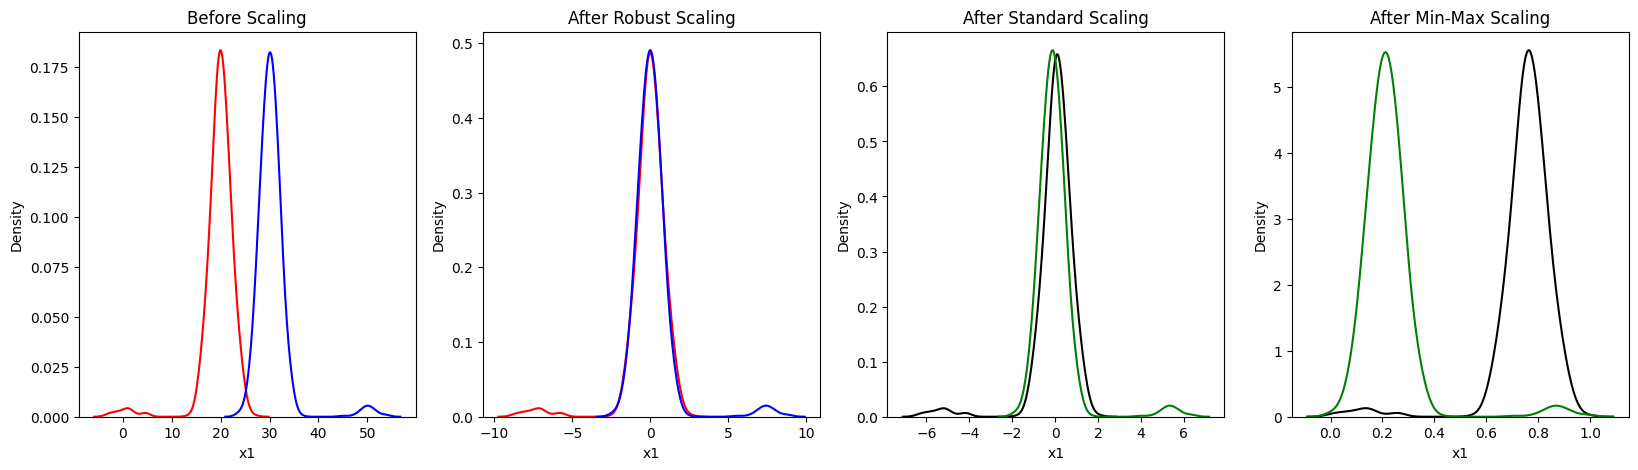

In [12]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# Data creation
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})

# Scaling using RobustScaler
scaler = preprocessing.RobustScaler()
robust_df = pd.DataFrame(scaler.fit_transform(x), columns=['x1', 'x2'])

# Scaling using StandardScaler
scaler = preprocessing.StandardScaler()
standard_df = pd.DataFrame(scaler.fit_transform(x), columns=['x1', 'x2'])

# Scaling using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
minmax_df = pd.DataFrame(scaler.fit_transform(x), columns=['x1', 'x2'])

# Plotting the distributions
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1, color='r')
sns.kdeplot(x['x2'], ax=ax1, color='b')

# After Robust Scaling
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_df['x1'], ax=ax2, color='red')
sns.kdeplot(robust_df['x2'], ax=ax2, color='blue')

# After Standard Scaling
ax3.set_title('After Standard Scaling')
sns.kdeplot(standard_df['x1'], ax=ax3, color='black')
sns.kdeplot(standard_df['x2'], ax=ax3, color='g')

# After Min-Max Scaling
ax4.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_df['x1'], ax=ax4, color='black')
sns.kdeplot(minmax_df['x2'], ax=ax4, color='g')

# Show the plot
plt.show()
